In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './Dataset/ex2data1.txt'
data = pd.read_csv(path, names = ['exam1', 'exam2', 'Admitted'])

"""
数据描述:
    exam1; exam2; Admitted
    基于两次测试的分值和录取结果
    构建是否被录取的分类器
    预测下一个学生否被录取,在知道他的两次exam的得分后
"""
data.head()

,exam1,exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
admitted = data[data['Admitted'].isin([1])]
notadmitted = data[data['Admitted'].isin([0])]

In [4]:
admitted.head()

,exam1,exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [5]:
notadmitted.head()

,exam1,exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


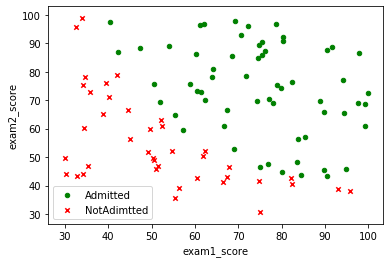

In [6]:
fig = plt.figure()
ax = fig.add_subplot()   # 创建子图

# 散点图
ax.scatter(admitted['exam1'], admitted['exam2'], s = 20, c ='g', marker = 'o', label = 'Admitted')
ax.scatter(notadmitted['exam1'], notadmitted['exam2'], s = 20, c ='r', marker = 'x', label = 'NotAdimtted')

ax.legend()    # 增加图例

ax.set_xlabel('exam1_score')
ax.set_ylabel('exam2_score')

plt.show()

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

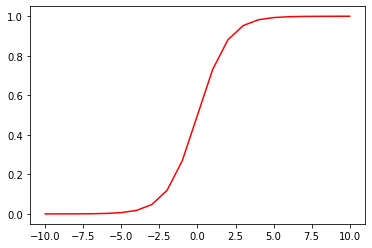

In [8]:
fig, ax = plt.subplots()

x = np.arange(-10, 11, 1)
ax.plot(x, sigmoid(x), c = 'r')
plt.show()

## 逻辑回归

<font size=4>***Hypothesis:***</font><br>
&emsp;&emsp;$$h_{\theta}(x) = \frac{1}{1 + e ^{-{\theta}^TX}}$$

<font size=4>***Decision Boundary:***</font><br>
&emsp;&emsp;$${\theta}^TX$$

<font size=4>***Cost Function:***</font><br>
&emsp;&emsp;$$J_{(\theta)} = \frac{1}{m} \sum_{i=1}^m [-ylog(h_{\theta}(x^{(i)}) - (1-y)log(1-h_{\theta}(x^{(i)})] $$<br>
&emsp;&emsp;$$J_{(\theta)} = \frac{1}{m} \sum_{i=1}^m [-ylog\frac{1}{1 + e ^{-{\theta}^TX^{(i)}}} - (1-y)log(1-\frac{1}{1 + e ^{-{\theta}^TX^{(i)}}})]$$

In [9]:
def cost_function(theta, X, y):
    
    left = np.multiply(-y, np.log(sigmoid(np.dot(X, theta))))
    right = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X, theta))))
    
    return np.sum(left - right) / len(X)

In [10]:
data.insert(0, 'ones', 1)

X = data.iloc[:, 0:3]
y = data.iloc[:, -1]

X = np.array(X)
y = np.array(y)

theta = np.zeros(3)

In [11]:
cost_function(theta, X, y)

0.6931471805599453

<font size=4>***Gradient Descent:***</font><br>
&emsp;&emsp;$${\theta}_j:= {\theta}_j - \alpha \frac{\partial J_{(\theta)}}{\partial \theta_j}$$<br>
&emsp;&emsp;$$\frac{\partial J_{(\theta)}}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$


In [12]:
def gradient(theta, X, y):
    grad = np.zeros(3)
    
    error = sigmoid(np.dot(X, theta)) - y
    
    for j in range(3):
        term = np.multiply(error, X[:, j])
        grad[j] = np.sum(term) / len(X)
        
    return grad

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [14]:
import scipy.optimize as opt

"""
func: 优化的目标函数(即要最小化的函数)
x0: 要最小化的函数的自变量
fprime: 提供优化函数的梯度函数
args: 目标函数的除x0以外的参数
"""
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(X, y))

# 返回三个值,第一个是优化函数的目标值,就是theta, (type=array)
result

(array([-25.16131866,   0.20623159,   0.20147149]), 36, 0)

In [15]:
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probability]

In [20]:
theta_min = result[0]
prediction = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(prediction, y)] 
accuracy = (sum(correct) % len(correct))
print(accuracy)

89

In [16]:
l = [1, 2, 3]
sum(l)

6